In [16]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def extract_data(log_dir):
    """
    Extract and save all plots from a TensorBoard logs directory.

    Args:
        log_dir (str): Path to the TensorBoard logs directory.
    """

    val = []
    keys = []

    # if not os.path.exists(output_dir):
    #     os.makedirs(output_dir)

    # Load TensorBoard logs
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    # Extract scalar keys
    scalar_keys = event_acc.Tags().get('scalars', [])
    
    for key in scalar_keys:
        # Get scalar data
        events = event_acc.Scalars(key)
        steps = [e.step for e in events]
        values = [e.value for e in events]
        val.append(values)
        keys.append(key)

                
    print(keys)

    return keys,val


In [17]:
chk_path="t_logs-20241222T164146Z-001/t_logs/Walker2d-v4"

In [18]:
# Example usage
data_list = []
for i in range(0,4):

    log_dir = os.path.join(chk_path,f"A2C_{i+1}") # Replace with your logs directory
    output_dir = f"tensorboard/PPO_{i}"  # Replace with your desired output directory
    data = extract_data(log_dir)
    data_list.append(data)

[]
['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'time/fps', 'train/entropy_loss', 'train/explained_variance', 'train/learning_rate', 'train/policy_loss', 'train/std', 'train/value_loss', 'eval/mean_ep_length', 'eval/mean_reward']
['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'time/fps', 'train/entropy_loss', 'train/explained_variance', 'train/learning_rate', 'train/policy_loss', 'train/std', 'train/value_loss', 'eval/mean_ep_length', 'eval/mean_reward']
['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'time/fps', 'train/entropy_loss', 'train/explained_variance', 'train/learning_rate', 'train/policy_loss', 'train/std', 'train/value_loss', 'eval/mean_ep_length', 'eval/mean_reward']


In [26]:
data_list.pop(0)
keys = data_list[0][0]

In [27]:
data_final = {}
for key in keys:
    data_final[key] = []


In [28]:
for idx,key in enumerate(keys):
    for file in data_list:
        data_final[key] += file[1][idx]

In [29]:
data_final

{'rollout/ep_len_mean': [34.224491119384766,
  55.06060791015625,
  72.4935073852539,
  77.48999786376953,
  92.20999908447266,
  102.9000015258789,
  100.05000305175781,
  96.4000015258789,
  98.19000244140625,
  99.51000213623047,
  98.41000366210938,
  91.11000061035156,
  86.08000183105469,
  88.86000061035156,
  98.88999938964844,
  100.81999969482422,
  109.04000091552734,
  114.16999816894531,
  120.3499984741211,
  118.0999984741211,
  117.12000274658203,
  122.12000274658203,
  100.38999938964844,
  103.88999938964844,
  112.98999786376953,
  116.08999633789062,
  112.22000122070312,
  111.23999786376953,
  123.73999786376953,
  136.52000427246094,
  136.6300048828125,
  133.47000122070312,
  128.10000610351562,
  124.94999694824219,
  134.8000030517578,
  132.33999633789062,
  136.10000610351562,
  136.55999755859375,
  137.07000732421875,
  140.1699981689453,
  146.80999755859375,
  148.7899932861328,
  148.14999389648438,
  151.75,
  153.52000427246094,
  155.36000061035156

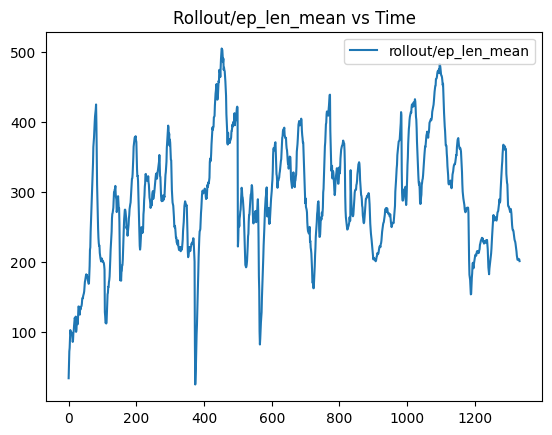

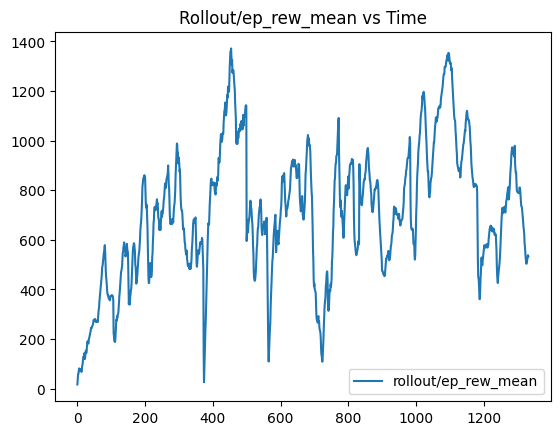

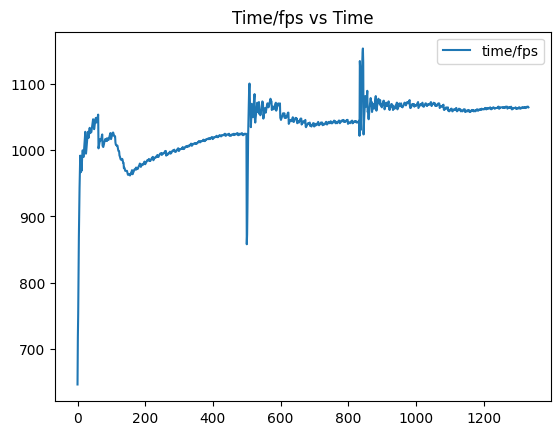

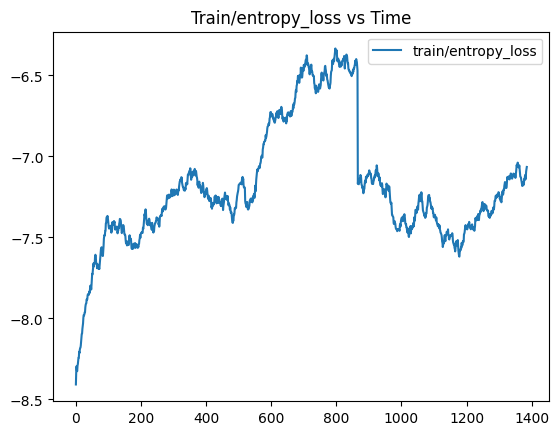

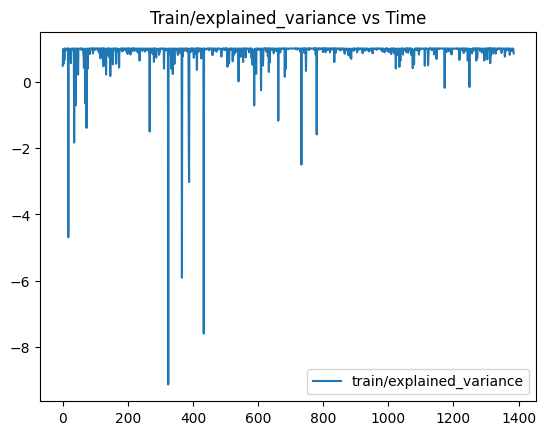

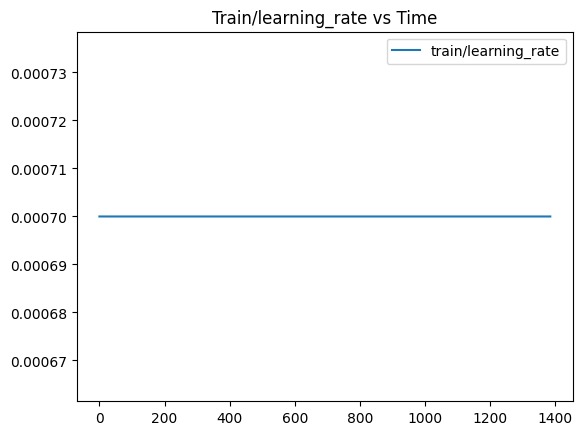

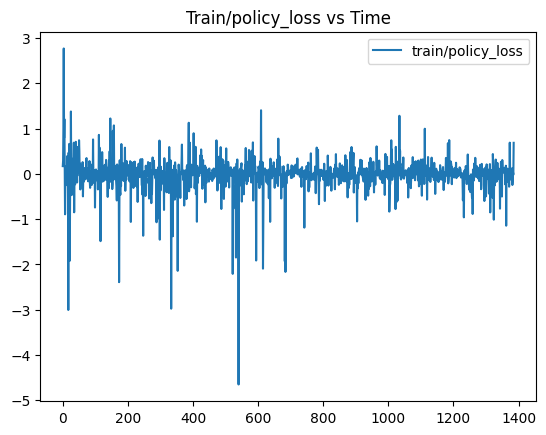

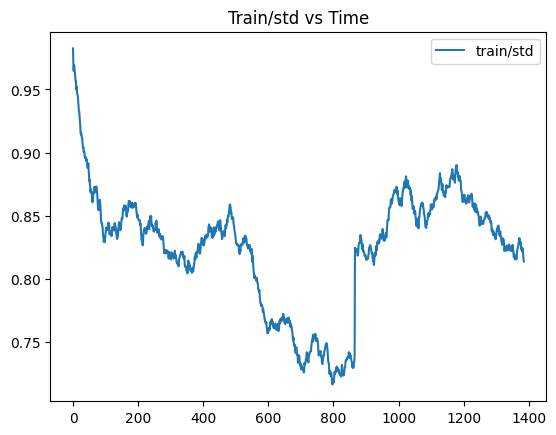

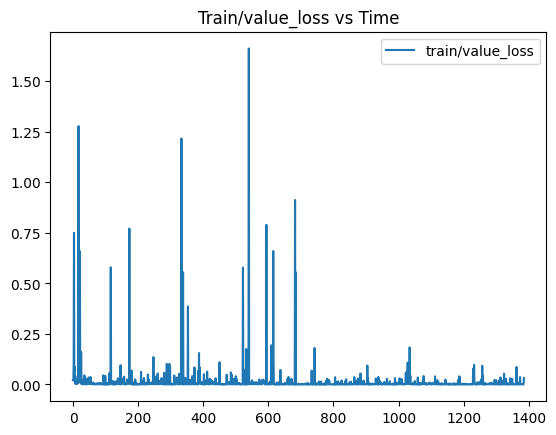

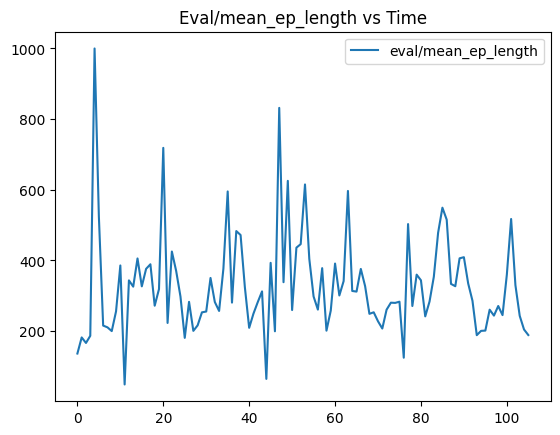

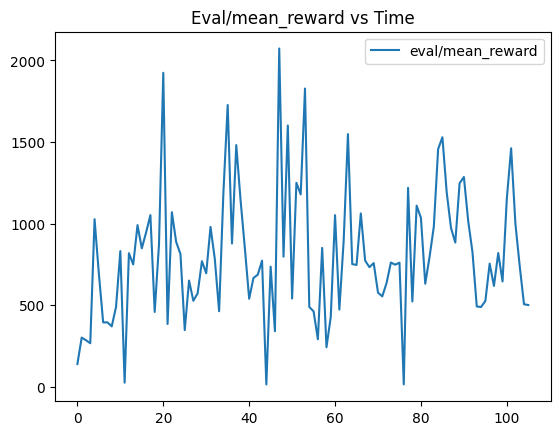

In [30]:
import random

# colors = [f'#{random.randint(0, 0xFFFFFF):08x}' for _ in range(len(keys))]  # Generate random colors

for i, key in enumerate(keys):
    plt.title(f"{str(key).capitalize()} vs Time")
    plt.plot(data_final[key], label=f"{key}")  # Assign a random color
    plt.legend()
    plt.show()

In [31]:
keys

['rollout/ep_len_mean',
 'rollout/ep_rew_mean',
 'time/fps',
 'train/entropy_loss',
 'train/explained_variance',
 'train/learning_rate',
 'train/policy_loss',
 'train/std',
 'train/value_loss',
 'eval/mean_ep_length',
 'eval/mean_reward']

In [32]:
len(data_list)

3